In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color: #3636ff; font-family:'Orbitron' ; text-shadow: 5px 5px 5px #aaa;}
a {color: #3636ff;}
div.output_area pre , div.output_area html {font-size:110%; color: #3636ff;}     
</style>

## For creating posts

# When you need to select all segments 
# satisfying the condition
Jupyter Notebook & Python Kernel

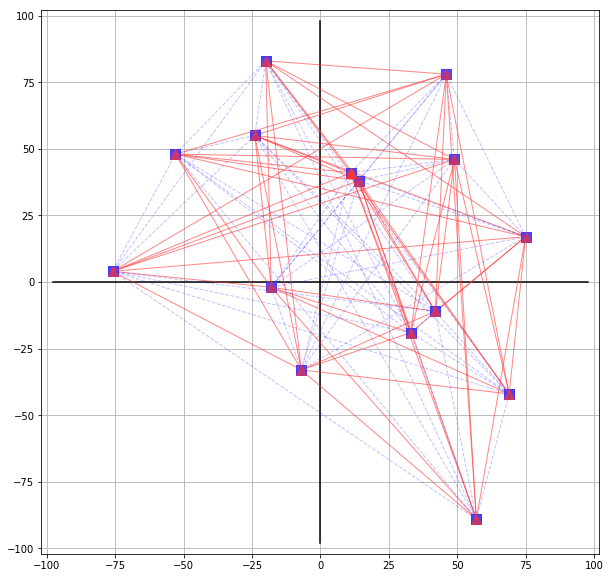

In [19]:
import numpy, pylab as plt
N = 15; A = numpy.random.randint(-100,100,(N,2))
plt.figure(figsize=(10,10)); plt.grid(); plt.xlim(-102,102); plt.ylim(-102,102)
plt.axhline(0,0.02,0.98,c='black'); plt.axvline(0,0.02,0.98,c='black')
for i in range(N):
    for j in range(i+1,N):
        condition = (A[i][0]*A[i][1]>0)&(A[j][0]*A[j][1]<0) or \
                    (A[i][0]*A[i][1]<0)&(A[j][0]*A[j][1]>0)
        if condition: 
            ls='-'; c='#ff3636'; alpha=0.6; marker='^'
        else:
            ls='--'; c='#3636ff'; alpha=0.3; marker='s'
        plt.plot([A[i][0],A[j][0]],[A[i][1],A[j][1]],'-o',ms=10,lw=1,
                 marker=marker,alpha=alpha,ls=ls,c=c) 

# When you think it's hard to check your decision
# Not this time... Not with calculus
Jupyter Notebook & Python Kernel

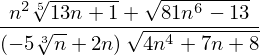

In [3]:
import sympy, time
sympy.init_printing(use_unicode=True)
n = sympy.symbols('n')
a = (n**2*sympy.root(13*n+1,5)+sympy.sqrt(81*n**6-13))/\
    ((2*n-5*sympy.cbrt(n))*sympy.sqrt(4*n**4+7*n+8))
a

In [4]:
start_time = time.time()
sympy.limit(a,n,sympy.S.Infinity).n()
print('%s seconds' % (time.time()-start_time))

3.068145990371704 seconds


In [5]:
sympy.limit(a,n,sympy.S.Infinity).n()

# If you think processing images is a hard task
# Think again
Jupyter Notebook & Python Kernel

Image Link 

https://github.com/OlgaBelitskaya/deep_learning_projects/blob/master/DL_PP0/data/flower_images/0006.png

          (128, 128, 3)           (128, 128, 1)


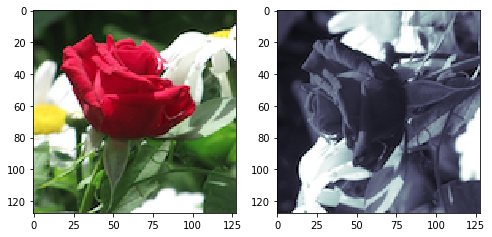

In [20]:
import pylab, keras
from keras.preprocessing import image as keras_image
path = "../deep_learning_projects/DL_PP0/data/flower_images/"; file = "0006.png"
def display_img(f,s=128):
    img = keras_image.load_img(f,target_size=(s,s)) 
    img = keras_image.img_to_array(img)/255 
    grey_img = keras_image.load_img(f,color_mode="grayscale",target_size=(s,s))
    grey_img = keras_image.img_to_array(grey_img) 
    fig = pylab.figure(figsize=(8,4)) 
    ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
    ax1.imshow(img); ax2.imshow(grey_img.reshape(s,s).T,cmap=pylab.cm.bone)
    print(9*' ',img.shape,9*' ',grey_img.shape)
display_img(path+file)

# If you think creating neural networks 
# is something special... Not at all...
Jupyter Notebook & Python Kernel

One classic example of labeling with a very simple network

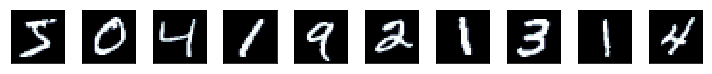

In [50]:
import pylab, keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
fig,ax = pylab.subplots(figsize=(10,2),nrows=1,ncols=10,sharex=True,sharey=True,)
ax = ax.flatten(); ax[0].set_xticks([]); ax[0].set_yticks([])
[ax[i].imshow(x_train[i].reshape(28,28),cmap=pylab.cm.bone) for i in range(10)]
pylab.tight_layout(); pylab.gcf();
x_train,x_test = x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)
y_train,y_test = keras.utils.to_categorical(y_train),keras.utils.to_categorical(y_test)
n = int(len(x_test)/2)
x_valid,y_valid = x_test[:n],y_test[:n]; x_test,y_test = x_test[n:],y_test[n:]

In [51]:
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,GlobalMaxPooling2D
from keras.layers.advanced_activations import LeakyReLU; from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
def model():
    model = Sequential()    
    model.add(Conv2D(28,(5,5),padding='same',input_shape=(28,28,1)))
    model.add(LeakyReLU(alpha=0.02))
    model.add(MaxPooling2D(pool_size=(2,2))); model.add(Dropout(0.2))
    model.add(Conv2D(96,(5,5))); model.add(LeakyReLU(alpha=0.02))    
    model.add(MaxPooling2D(pool_size=(2,2))); model.add(Dropout(0.2))
    model.add(GlobalMaxPooling2D()); model.add(Dense(512)) 
    model.add(LeakyReLU(alpha=0.02)); model.add(Dropout(0.5))     
    model.add(Dense(10)); model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])    
    return model
model = model()
checkpointer = ModelCheckpoint(filepath='weights.digits.hdf5',save_best_only=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=0,factor=0.5)
model.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_valid,y_valid),
          verbose=0,callbacks=[checkpointer,lr_reduction]);

In [52]:
model.load_weights('weights.digits.hdf5')
print("accuracy: %.2f%%" % (model.evaluate(x_test,y_test)[1]*100))

5000/5000 [==============================] - ETA:  - 10s 2ms/step
accuracy: 99.56%


# If you think creating image datasets 
# is something special... No, it's not true...
Jupyter Notebook & Python Kernel

Datasets = {folder with image files & `csv` file with two columns `file names <-> labels`}

One example of extracting datasets of this type

In [10]:
import numpy, pandas, h5py
from tqdm import tqdm
from keras.preprocessing import image as keras_image
# path to the folder with photos 
path = "../deep_learning_projects/DL_PP2/data/"
# csv file with the mapping "file names -> labels"
data = pandas.read_csv(path+"letters.csv")
# function for converting every image into an array
def image_to_tensor(file,size): 
    img = keras_image.load_img(path+file,target_size=(size,size)) 
    img = keras_image.img_to_array(img)
    return numpy.expand_dims(img,axis=0)
# function for converting all images in the folder
def folder_to_tensor(folder_path,size):
    tensors = numpy.vstack([image_to_tensor(file,size) for file in tqdm(folder_path)])
    return tensors.astype('float32')/255

images = folder_to_tensor(data['file'],32);
# mapping "image tensor -> csv data" in one file
with h5py.File('LetterColorData.h5', 'w') as f:
    f.create_dataset('images', data=images)
    f.create_dataset('labels', data=data['label'].values)
    f.create_dataset('backgrounds', data=data['background'].values)
    f.close()

100%|██████████| 1650/1650 [00:56<00:00, 29.22it/s]


# If you need to express yourself 
# with Pygal charts
Jupyter Notebook & Python Kernel

In [11]:
import pandas, pygal
columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
rows = [[26373,36423,22019,5154,4337,16523],
        [16165,4230,7595,201,4003,57],
        [14276,803,3045,485,100,518]]
samples = pandas.DataFrame(rows,columns=columns); samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,16165,4230,7595,201,4003,57
2,14276,803,3045,485,100,518


In [12]:
style = pygal.style.BlueStyle(opacity='.3',background='transparent',
                              colors=('#1b2c45','steelblue','darkcyan','red'))
line = pygal.Line(fill=False,height=300,style=style)
line.title = 'Samples of the Wholesale Customers Dataset'
line.x_labels = list(samples)
line.add('C0',list(samples.loc[0])); line.add('C1',list(samples.loc[1]))
line.add('C2',list(samples.loc[2])); line.add('Mean',list(samples.mean()))
line.render_to_file('samples.svg')

In [13]:
%%html
<figure><embed type="image/svg+xml" src="samples.svg"/></figure>

# When you need to imagine the data points
Jupyter Notebook & Python Kernel

Data: https://archive.ics.uci.edu/ml/datasets/wholesale+customers

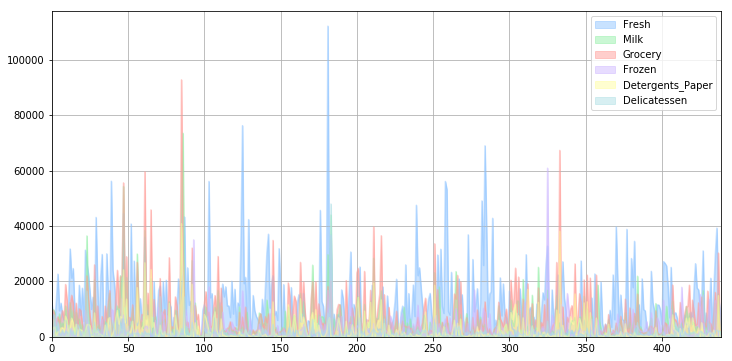

In [14]:
import pandas, seaborn, pylab; pylab.style.use('seaborn-pastel')
path = "../projects/nd009/Machine_Learning_Engineer_ND_P3/"
data = pandas.read_csv(path+"customers.csv")
data.drop(['Region','Channel'],axis=1,inplace=True)
data.plot.area(stacked=False, figsize=(12,6), grid=True);

# That correlation plot which I like the most
Jupyter Notebook & Python Kernel

Data: https://archive.ics.uci.edu/ml/datasets/wholesale+customers

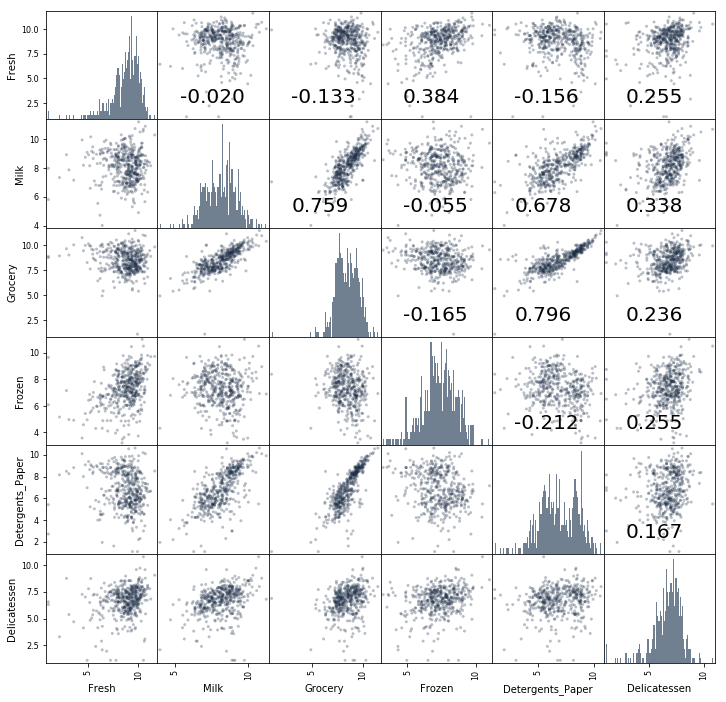

In [15]:
import pandas, numpy
path = "../projects/nd009/Machine_Learning_Engineer_ND_P3/"
data = pandas.read_csv(path+"customers.csv")
data.drop(['Region','Channel'],axis=1,inplace=True); log_data = numpy.log(data)
axes = pandas.plotting.scatter_matrix(log_data,alpha=0.3,figsize=(12,12),diagonal='hist',
                                      c='#1b2c45',hist_kwds={'color':'SlateGrey','bins':100})
corr = log_data.corr().values
for i, j in zip(*numpy.triu_indices_from(axes,k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j],(0.2,0.2),fontsize=20,
                         xycoords='axes fraction',ha='left',va='center');

# When you need to detect problem regions very quickly
Jupyter Notebook & Python Kernel

Data: https://www.kaggle.com/new-york-city/datasets

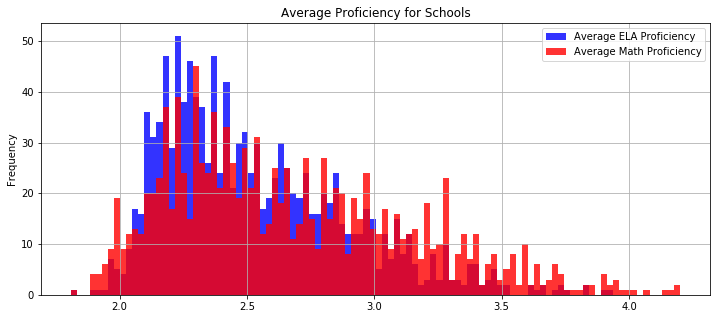

In [16]:
import pandas,pylab; path = '../kaggle_notebooks/'
se = pandas.read_csv(path+'2016 School Explorer.csv')
target_list = ['Average ELA Proficiency','Average Math Proficiency']
se[target_list].dropna().plot.hist(bins=100,alpha=0.8,figsize=(12,5),cmap=pylab.cm.bwr,
                                   grid=True,title='Average Proficiency for Schools');

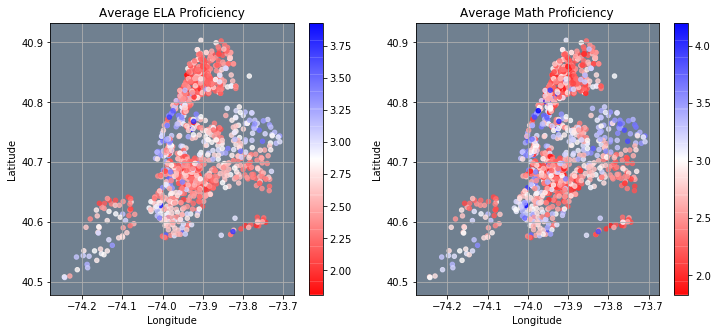

In [17]:
f, ax = pylab.subplots(ncols=2,figsize=(12,5))
for i in range(2):
    se.plot(kind="scatter",x="Longitude",y="Latitude",grid=True,c=se[target_list[i]], 
            title=target_list[i],ax=ax[i],cmap=pylab.cm.bwr_r,colorbar=True,alpha=0.8)
    ax[i].set_facecolor('slategray');

# When you think it's hard to find among data variables
# what is the most important for classification
# Not really...
Jupyter Notebook & Python Kernel

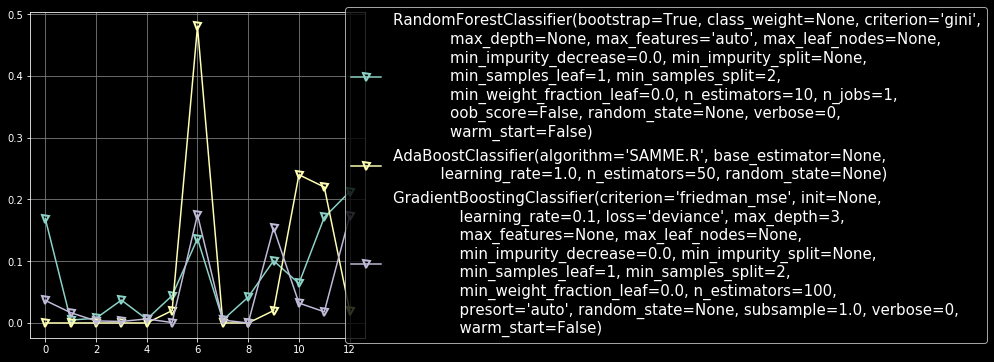

In [3]:
import pandas, pylab; pylab.style.use('dark_background'); pylab.figure(figsize=(6,6))
from sklearn import datasets; wine = datasets.load_wine()
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
classifiers = [RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier]
X,y = wine.data,wine.target; df_importance = pandas.DataFrame(columns=range(13))
for i in range(3):
    df_importance.loc[i] = classifiers[i]().fit(X,y).feature_importances_
    pylab.plot(df_importance.loc[i],'-v',label=str(classifiers[i]()),
               markersize=7,markerfacecolor="None",markeredgewidth=2)
pylab.grid(color='gray'); pylab.legend(loc=10,bbox_to_anchor=(1.9,0.5),fontsize=15); 

In [5]:
print(pylab.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# When you need to create 
# a toy dataset for experiments
Jupyter Notebook & Python Kernel

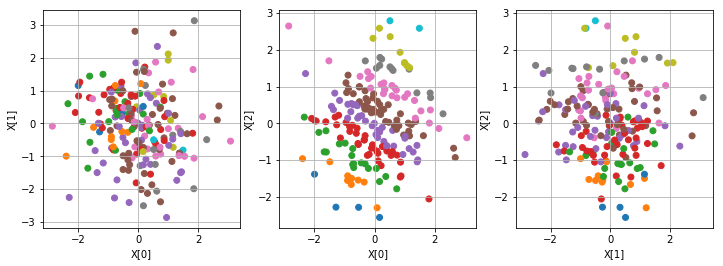

In [46]:
# 5000x3 matrix, 3 features (2 responsible for targets), 1 target, 0.95 - the bias factor
from sklearn import datasets; regression_data = datasets.make_regression(5000,3,2,1,0.95)
X, y = regression_data[0], regression_data[1]
import pylab as p; p.figure(1,figsize=(12,4))
p.subplot(131); p.scatter(X[:200,0],X[:200,1],c=y[:200],cmap=p.cm.tab10)
p.xlabel('X[0]'); p.ylabel('X[1]'); p.grid()
p.subplot(132); p.scatter(X[:200,0],X[:200,2],c=y[:200],cmap=p.cm.tab10)
p.xlabel('X[0]'); p.ylabel('X[2]'); p.grid()
p.subplot(133); p.scatter(X[:200,1],X[:200,2],c=y[:200],cmap=p.cm.tab10)
p.xlabel('X[1]'); p.ylabel('X[2]'); p.grid()

# If you want to be a little bit magician
# Just register your magic function
Jupyter Notebook & Python Kernel

Image Link https://github.com/OlgaBelitskaya/deep_learning_projects/blob/master/DL_PP5/data/01_01_1_007.png

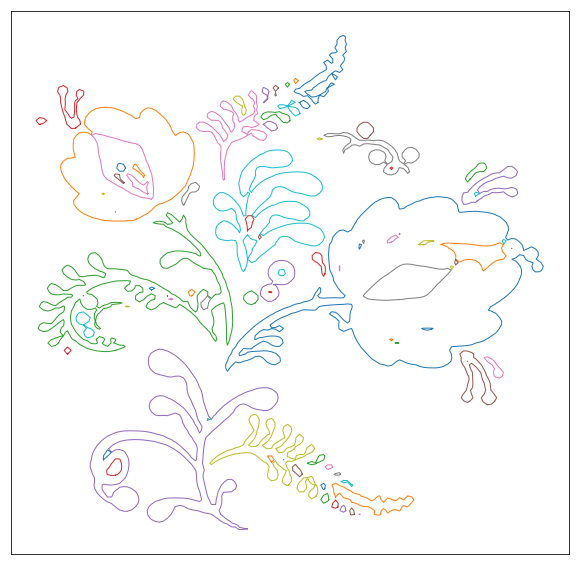

In [45]:
from IPython.core.magic import register_line_magic
import pylab; from skimage import data, color, measure
@register_line_magic
def vector(file):
    img = data.imread(file); grey_img = color.colorconv.rgb2grey(img)
    contours = measure.find_contours(grey_img,0.75)
    pylab.figure(figsize=(10,10)); pylab.gca().invert_yaxis()
    pylab.xticks([]); pylab.yticks([]); 
    [pylab.plot(c[:,1],c[:,0],lw=1) for c in contours]
%vector ../deep_learning_projects/DL_PP5/data/01_01_1_007.png 

# If you want to hide this very useful row $\mathbb{(-1.1,1.1)}$
# Just add $\mathbb{;}$ in the end
Jupyter Notebook & Python Kernel

In [53]:
import numpy; from matplotlib import pylab,collections,colors,cm
x = numpy.linspace(0,4*numpy.pi,100); y = numpy.sin(x)
xy = numpy.array([x,y]).T.reshape(-1,1,2);
segments = numpy.concatenate([xy[:-1],xy[1:]],axis=1)
cmap = colors.ListedColormap(['#3636ff','#ff36ff','#ff3636'])
norm = colors.BoundaryNorm([-1,-0.5,0.5,1],cmap.N)
def colorline(z):
    colorline = collections.LineCollection(segments,cmap=cmap,norm=norm)
    colorline.set_linewidth(5); colorline.set_array(z)
    pylab.gca().add_collection(colorline)

(-1.1, 1.1)

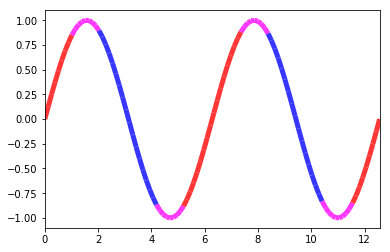

In [54]:
z = numpy.cos(0.5*(x[:-1]+x[1:])); colorline(z)
pylab.xlim(x.min(),x.max()); pylab.ylim(-1.1,1.1)

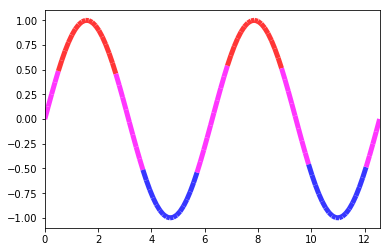

In [55]:
z = numpy.sin(0.5*(x[:-1]+x[1:])); colorline(z)
pylab.xlim(x.min(),x.max()); pylab.ylim(-1.1,1.1);

# If you think it's hard to calculate with tensors
# Think again
Jupyter Notebook & Python Kernel

In [63]:
import tensorflow as tf
X = tf.placeholder("float32", [None, None])
Y = (tf.sin(X)-tf.exp(X)*0.001)**2
x = [[0.19,0.24,0.37],[0.11,0.53,0.27],[0.73,0.38,0.95],[0.43,0.55,0.61]]
with tf.Session() as session:
    y = session.run(Y,feed_dict={X:x})
print(y)

[[0.03521239 0.05589978 0.12972076]
 [0.01180743 0.25384906 0.07044856]
 [0.4419518  0.13649932 0.657445  ]
 [0.17250195 0.2713931  0.3260719 ]]


## Additional material

,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2


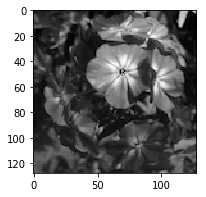

In [30]:
import pylab, keras, pandas
from keras.preprocessing import image as keras_image
path = "../deep_learning_projects/DL_PP0/data/flower_images/"; file='0001.png'
s=128; img = keras_image.load_img(path+file,target_size=(s,s)) 
img = keras_image.img_to_array(img)/255; grey_img = img[...,1]
fig = pylab.figure(figsize=(3,3)); ax = fig.add_subplot(111) 
ax.imshow(grey_img,cmap=pylab.cm.binary_r)
data = pandas.read_csv(path+"flower_labels.csv"); data.head(3)